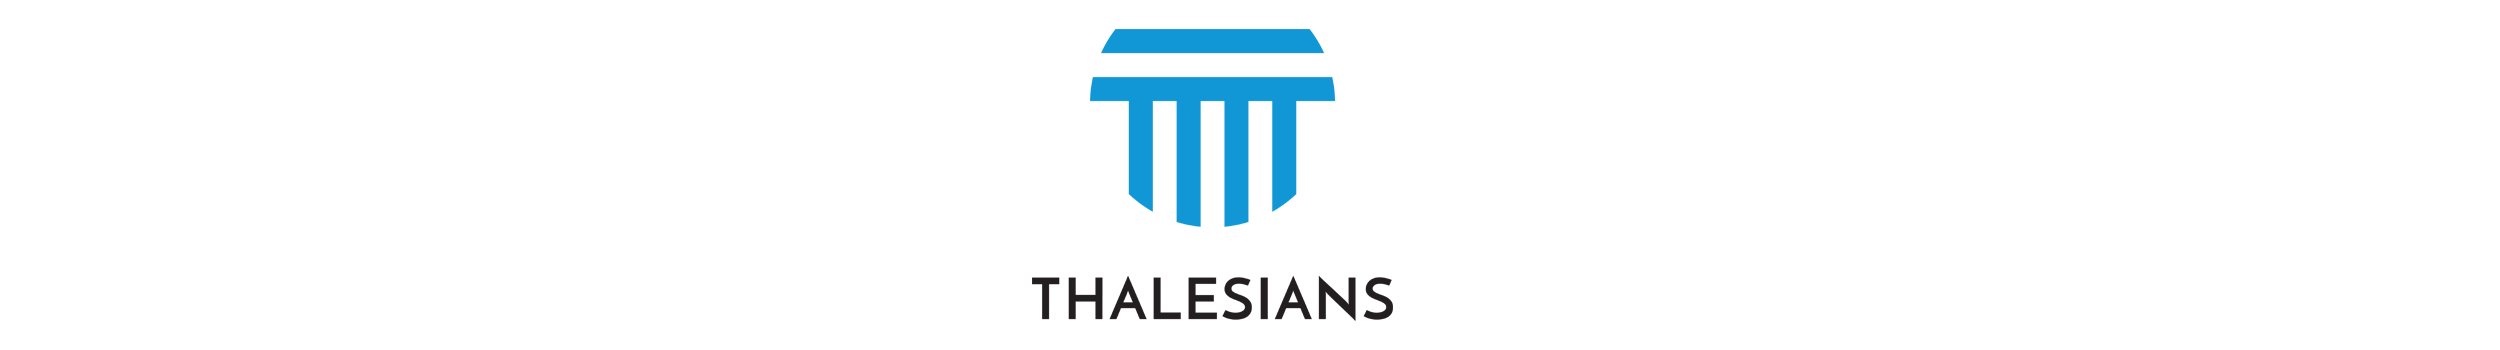

# Visualisation

In [1]:
# Copyright (c) Thalesians Ltd, 2019-2023. All rights reserved.
# Copyright (c) Paul Alexander Bilokon, 2019-2023. All rights reserved.
# Author: Paul Alexander Bilokon <paul@thalesians.com>
# This version: 2.0 (2023.11.17)
# Previous versions: 1.0 (2019.09.05)
# Email: info@thalesians.com

## Motivation

Before performing deep mathematical analyses on the data it is helpful to get a clearer view of the story that the data is telling. This is best achieved through **visualisation**. In this chapter we introduce Python libraries used for visualising the data and mention some of the most useful plots that can be produced.

## Objectives

1. To introduce histograms.
1. To show how the labels can be rotated to improve the readability of the plots.
1. To introduce scatter plots.
1. To explain when a scatter plot indicates a meaningful relationship between the variables.
1. To show how scatter plots can serve as maps.
1. To show how individual points can be labelled, so the plot can be linked back to the `DataFrame`.
1. To demonstrate how point sizes and colours can be used to convey additional information about the data.
1. To show how `xlim()` and `ylim()` can be used to zoom in and out of interesting regions on plots.
1. To introduce time series plots.
1. To introduce heatmaps.

## Histogram

Let us again

In [2]:
import pandas as pd

and consider the `pandas` `DataFrame`

In [3]:
df = pd.DataFrame(
    {
        'transaction date': [2012.917, 2012.917, 2013.583, 2013.500, 2012.833, 2012.667, 2012.667, 2013.417, 2013.500, 2013.417, 2013.083, 2013.333, 2012.917, 2012.667, 2013.500],
        'distance to the nearest MRT station': [84.87882, 306.59470, 561.98450, 561.98450, 390.56840, 2175.03000, 623.47310, 287.60250, 5512.03800, 1783.18000, 405.21340, 90.45606, 492.23130, 2469.64500, 1164.83800],
        'number of convenience stores': [10, 9, 5, 5, 5, 3, 7, 6, 1, 3, 1, 9, 5, 4, 4],
        'latitude': [24.98298, 24.98034, 24.98746, 24.98746, 24.97937, 24.96305, 24.97933, 24.98042, 24.95095, 24.96731, 24.97349, 24.97433, 24.96515, 24.96108, 24.99156],
        'longitude': [121.54024, 121.53951, 121.54391, 121.54391, 121.54245, 121.51254, 121.53642, 121.54228, 121.48458, 121.51486, 121.53372, 121.54310, 121.53737, 121.51046, 121.53406],
        'house price per unit area': [37.9, 42.2, 47.3, 54.8, 43.1, 32.1, 40.3, 46.7, 18.8, 22.1, 41.4, 58.1, 39.3, 23.8, 34.3]
    },
    columns=[
        'transaction date',
        'distance to the nearest MRT station',
        'number of convenience stores',
        'latitude',
        'longitude',
        'house price per unit area'
    ])

In order to be able to include figures in a Jupyter notebook, we must issue the magic command

In [4]:
%matplotlib inline

One quick way to make sense of the columns is by plotting the **histograms**

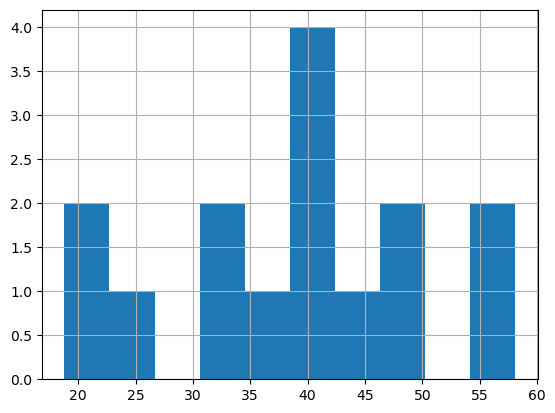

In [5]:
df['house price per unit area'].hist();

In a histogram, the values located close together are grouped together into **bars**. The initial and final values of the bar are indicated on the $x$-axis, whereas on the $y$-axis we see how many points belong to that bar.

Thus we see where the bulk of the data is concentrated. Here we have used `pandas` wrappers for visualisation commands. If the data does not come in a `pandas` dataframe, we may choose to use Matplotlib (the *de facto* standard Python visualisation library) directly:

In [6]:
import matplotlib.pyplot as plt

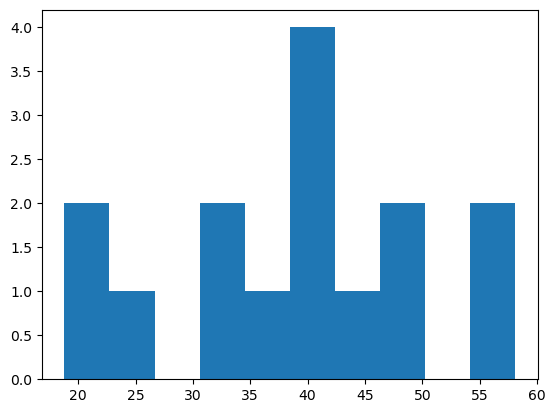

In [7]:
plt.hist(df['house price per unit area'].values);

It is generally useful to produce histograms for all numeric columns to see if the data is concentrated around a particular point or points and how much it is dispersed.

It may also be helpful to add the mean, the mean minus one standard deviation, and the mean plus one standard deviation to the plot:

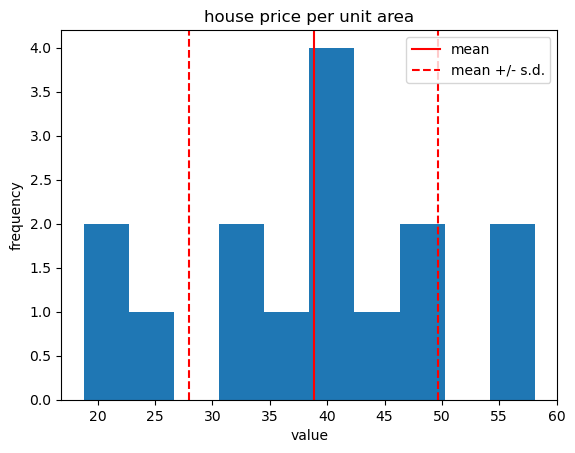

In [8]:
import numpy as np
plt.hist(df['house price per unit area'].values)
mean = np.mean(df['house price per unit area'].values)
var = np.var(df['house price per unit area'].values)
sd = np.sqrt(var)
plt.axvline(mean, color='r', label='mean')
plt.axvline(mean + sd, linestyle='--', color='r', label='mean +/- s.d.')
plt.axvline(mean - sd, linestyle='--', color='r')
plt.title('house price per unit area')
plt.xlabel('value')
plt.ylabel('frequency')
plt.legend();

#### Exercise

Repeat the above plot for the `'latitude'` column.

#### Solution

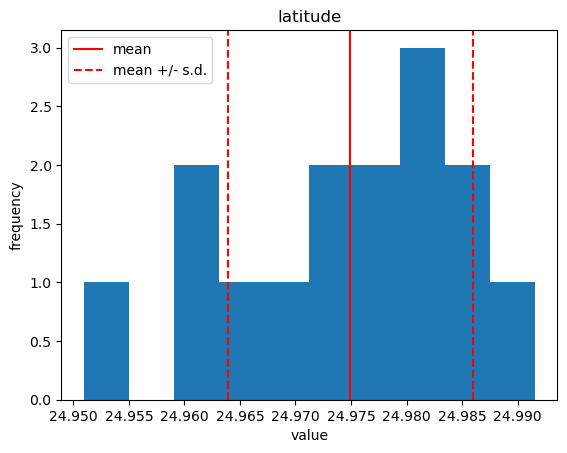

In [9]:
plt.hist(df['latitude'].values)
mean = np.mean(df['latitude'].values)
var = np.var(df['latitude'].values)
sd = np.sqrt(var)
plt.axvline(mean, color='r', label='mean')
plt.axvline(mean + sd, linestyle='--', color='r', label='mean +/- s.d.')
plt.axvline(mean - sd, linestyle='--', color='r')
plt.title('latitude')
plt.xlabel('value')
plt.ylabel('frequency')
plt.legend();

## Rotating the tick labels

As in the above exercise, the tick labels may be hard to read if they are too close together. A useful trick, then, is to rotate them through 45 degrees to improve readability:

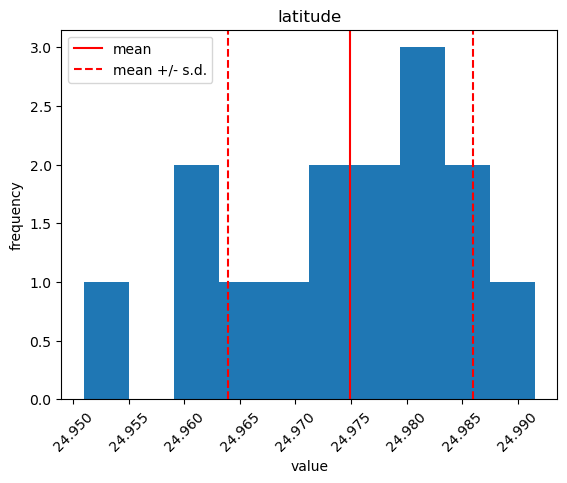

In [10]:
plt.hist(df['latitude'].values)
mean = np.mean(df['latitude'].values)
var = np.var(df['latitude'].values)
sd = np.sqrt(var)
plt.axvline(mean, color='r', label='mean')
plt.axvline(mean + sd, linestyle='--', color='r', label='mean +/- s.d.')
plt.axvline(mean - sd, linestyle='--', color='r')
plt.title('latitude')
plt.xlabel('value')
plt.ylabel('frequency')
plt.legend()
plt.xticks(rotation=45);

#### Exercise

Repeat the above plot for the `'longitude'` column.

#### Solution

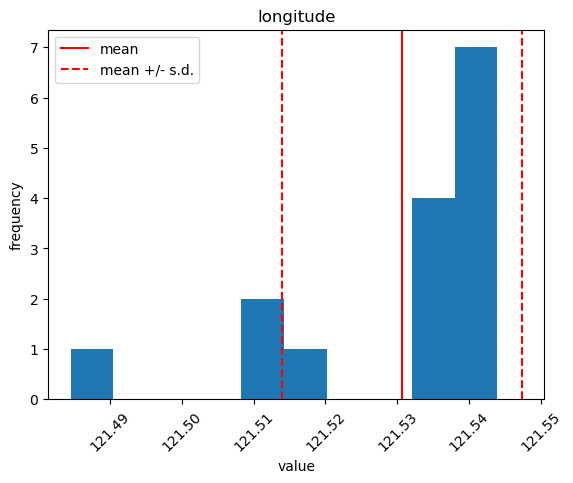

In [11]:
plt.hist(df['longitude'].values)
mean = np.mean(df['longitude'].values)
var = np.var(df['longitude'].values)
sd = np.sqrt(var)
plt.axvline(mean, color='r', label='mean')
plt.axvline(mean + sd, linestyle='--', color='r', label='mean +/- s.d.')
plt.axvline(mean - sd, linestyle='--', color='r')
plt.title('longitude')
plt.xlabel('value')
plt.ylabel('frequency')
plt.legend()
plt.xticks(rotation=45);

## Scatter plot

In many cases we are interested in performing regression analysis, i.e. finding out how a particular quantity depends on another quantity. In our example `DataFrame` we are likely to be interested in how the `'house price per unit area'` (the **dependent variable**) depends on all the other variables (the **independent variables**), such as, for example, the `'number of convenience stores'`.

**Scatter plots** are often illuminating. We simply plot the dependent variable versus the independent variable. I.e. we plot the dependent variable on the $y$-axis and the independent variable on the $x$-axis:

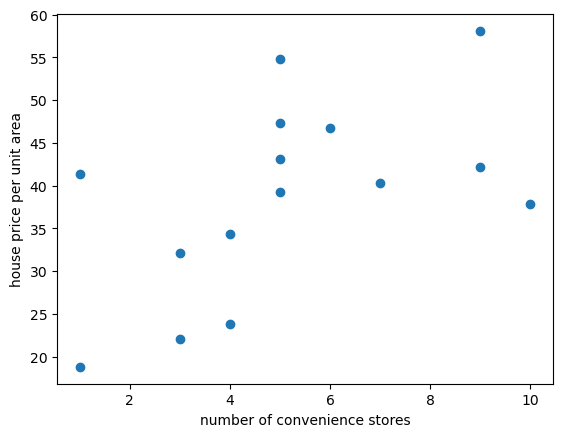

In [12]:
plt.plot(df['number of convenience stores'].values, df['house price per unit area'], 'o')
plt.xlabel('number of convenience stores')
plt.ylabel('house price per unit area');

In this particular example there are too few points for us to reach a particular conclusion.

In general, when there is a strong linear relationship between the variables, we should see something like what we produce in the following toy example using generated, pseudorandom data:

In [13]:
size = 1000
xs = np.random.normal(size=size)
ys = 3. * xs + 10. + np.random.normal(size=size)

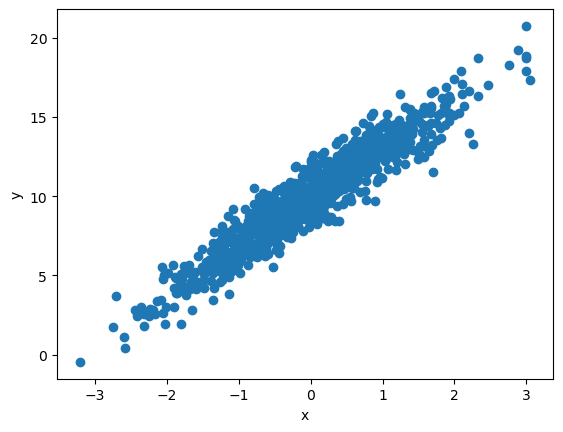

In [14]:
plt.plot(xs, ys, 'o')
plt.xlabel('x')
plt.ylabel('y');

This example is probably too good to be true. There is a clear relationship between the variables with relatively little noise; the points are concentrated around the diagonal line (indicating a relationship) and, because of the noise, scattered somewhat. So we get a **Gaussian cloud** of points scattered around a diagonal line.

This is visually indicative of a relationship between the variables. We could further perform **regression analysis**, either linear or nonlinear, to get at the actual mathematical relationship between the variables.

If we had a bit more noise, the plot would look like this:

In [15]:
size = 1000
xs = np.random.normal(size=size)
ys = 3. * xs + 10. + 5. * np.random.normal(size=size)

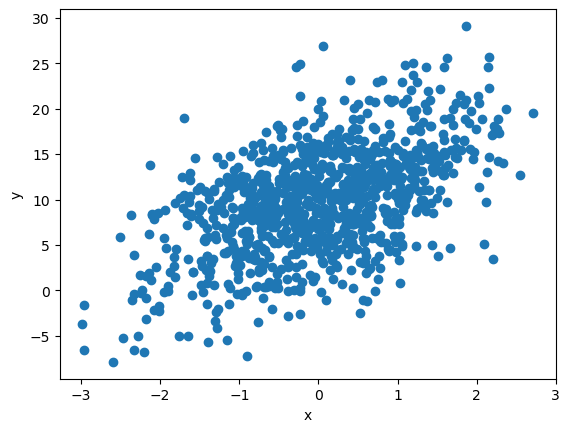

In [16]:
plt.plot(xs, ys, 'o')
plt.xlabel('x')
plt.ylabel('y');

Here the relationship is less clearly visible, but still evident.

#### Exercise

Produce a scatter plot of `'house price per unit area'` versus `'distance to the nearest MRT station'`.

#### Solution

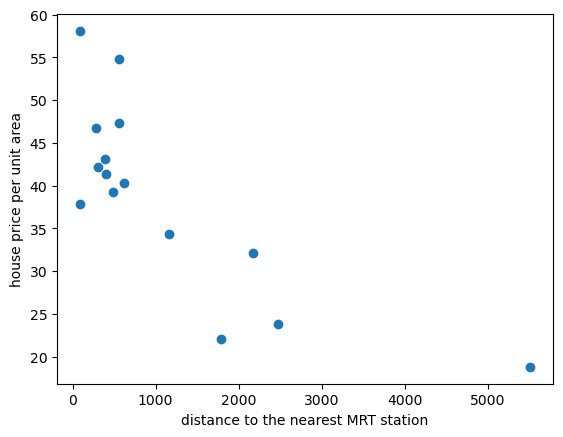

In [17]:
plt.plot(df['distance to the nearest MRT station'].values, df['house price per unit area'], 'o')
plt.xlabel('distance to the nearest MRT station')
plt.ylabel('house price per unit area');

Again, there are too few data points for us to be able to judge, but the house price per unit area seems to decrease with the distance to the nearest MRT station.

## Maps

In our example another scatter plot comes in useful:

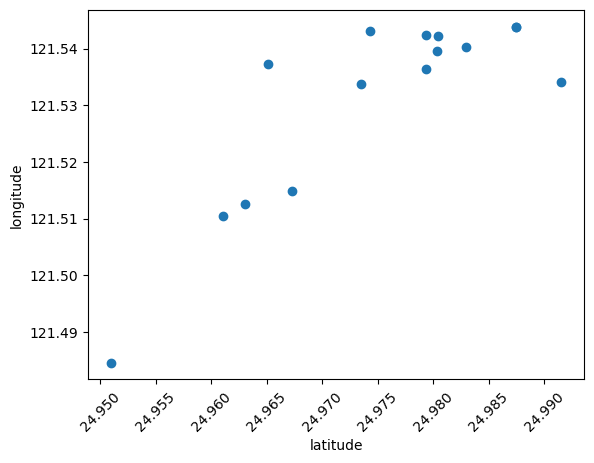

In [18]:
plt.plot(df['latitude'], df['longitude'], 'o')
plt.xticks(rotation=45)
plt.xlabel('latitude')
plt.ylabel('longitude');

By plotting the longitude versus the latitude, we obtain a **map** of the properties in the dataset. Python libraries provide access to maps of the underlying area. We could overlay one such map over the graph to get a clearer idea of where the properties are located.

## Labelling individual points

On the plot above it is difficult to tell which point is which. It would be helpful to label them with the `DataFrame`'s indices. This can be achieved using `plt.text()`:

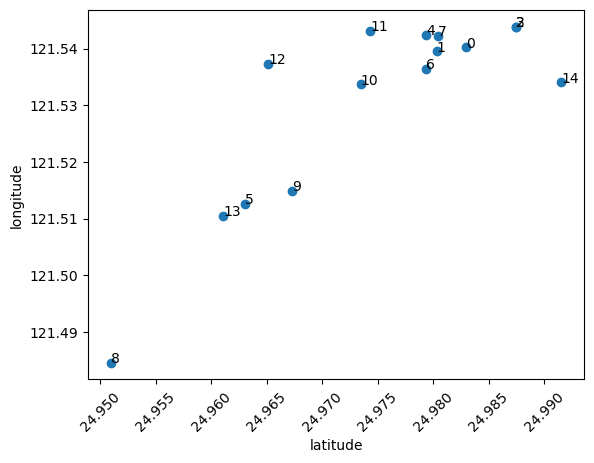

In [19]:
plt.plot(df['latitude'], df['longitude'], 'o')
plt.xticks(rotation=45)
plt.xlabel('latitude')
plt.ylabel('longitude');
for idx, x, y in zip(df.index, df['latitude'], df['longitude']):
    plt.text(x, y, idx)

Now we can relate the plot and the `DataFrame` through the index (the leftmost value below):

In [20]:
df

,transaction date,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price per unit area
0,2012.917,84.87882,10,24.98298,121.54024,37.9
1,2012.917,306.59470,9,24.98034,121.53951,42.2
2,2013.583,561.98450,5,24.98746,121.54391,47.3
3,2013.500,561.98450,5,24.98746,121.54391,54.8
4,2012.833,390.56840,5,24.97937,121.54245,43.1
5,2012.667,2175.03000,3,24.96305,121.51254,32.1
6,2012.667,623.47310,7,24.97933,121.53642,40.3
7,2013.417,287.60250,6,24.98042,121.54228,46.7
8,2013.500,5512.03800,1,24.95095,121.48458,18.8
9,2013.417,1783.18000,3,24.96731,121.51486,22.1


## Distinguishing points using different sizes

The above plot would be more instructive if we somehow represented the `'house price per unit area'` (the variable that we probably want to explain through other variables).

We could use the size of the points to signal this variable:

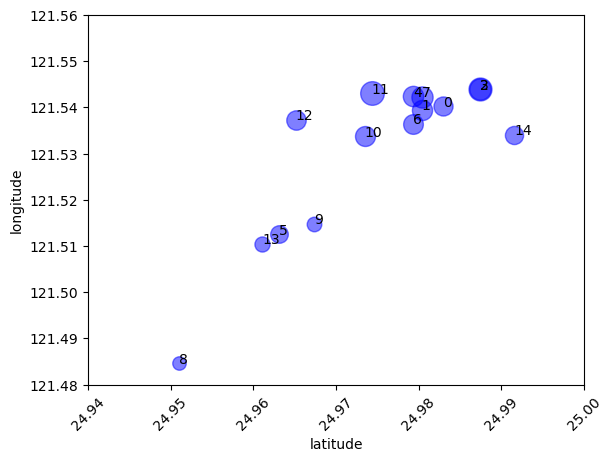

In [21]:
for idx, x, y, s in zip(df.index, df['latitude'], df['longitude'], df['house price per unit area']):
    plt.scatter(x, y, s=5*s, color='blue', alpha=.5)
    plt.text(x, y, idx)
plt.xticks(rotation=45)
plt.xlim((24.94, 25.))
plt.ylim((121.48, 121.56))
plt.xlabel('latitude')
plt.ylabel('longitude');

## Distinguishing points using different colours

Instead of (or in addition to) the point size we could have used colour:

C:\Users\paul\AppData\Local\Temp\ipykernel_38340\511204621.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('Blues')


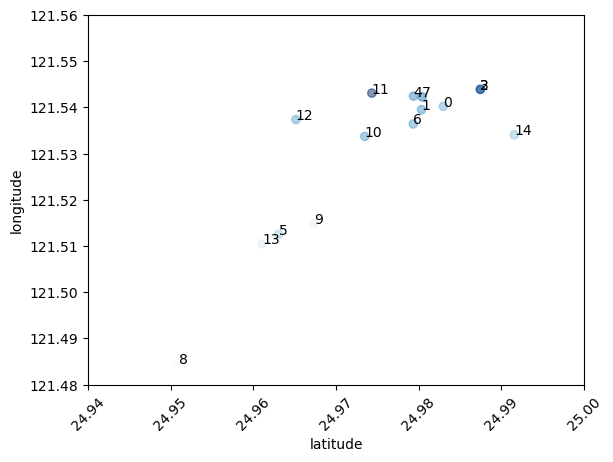

In [22]:
cm = plt.cm.get_cmap('Blues')
colours = df['house price per unit area'].values
plt.scatter(df['latitude'], df['longitude'], c=colours, alpha=.5, cmap=cm)
for idx, x, y in zip(df.index, df['latitude'], df['longitude']):
    plt.text(x, y, idx)
plt.xticks(rotation=45)
plt.xlim((24.94, 25.))
plt.ylim((121.48, 121.56))
plt.xlabel('latitude')
plt.ylabel('longitude');

## Zooming in and out

Note how in the above example we have used `plt.xlim()` and `plt.ylim()` to fit a specific rectangle into the plot. We could use them to zoom into a particular area of interest:

C:\Users\paul\AppData\Local\Temp\ipykernel_38340\817892768.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('Blues')


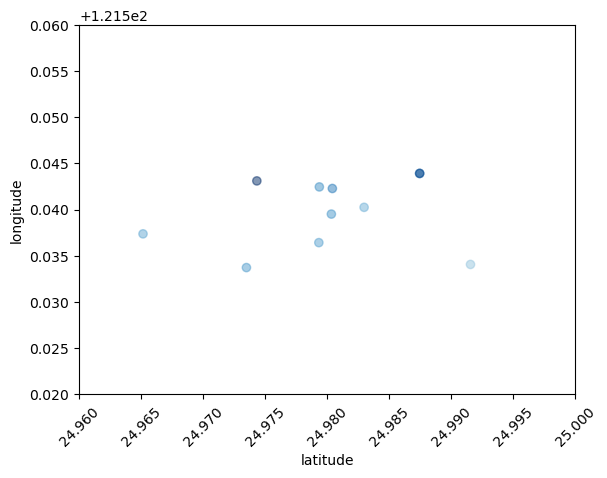

In [23]:
cm = plt.cm.get_cmap('Blues')
colours = df['house price per unit area'].values
plt.scatter(df['latitude'], df['longitude'], c=colours, alpha=.5, cmap=cm)
plt.xticks(rotation=45)
plt.xlim((24.96, 25.))
plt.ylim((121.52, 121.56))
plt.xlabel('latitude')
plt.ylabel('longitude');

## Time series plot

In data science we are often interested in values that change over time. To understand the evolution of such values we produce time series plots. In this case, on the $x$-axis we plot the time, on the $y$-axis the value of interest.

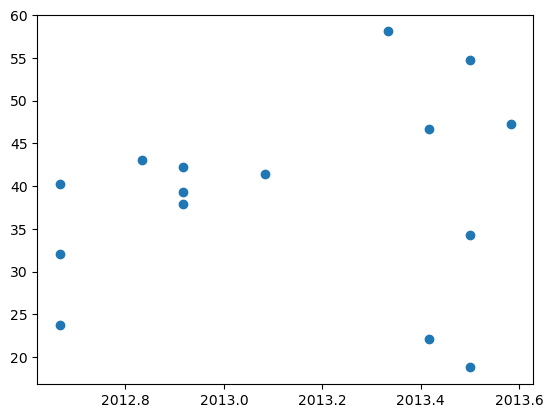

In [24]:
plt.plot(df['transaction date'], df['house price per unit area'], 'o');

In this particular example, there is little to indicate that the `'transaction date'` has a strong effect on the `'house price per unit area'`.

In finance we find many examples of time series plots:

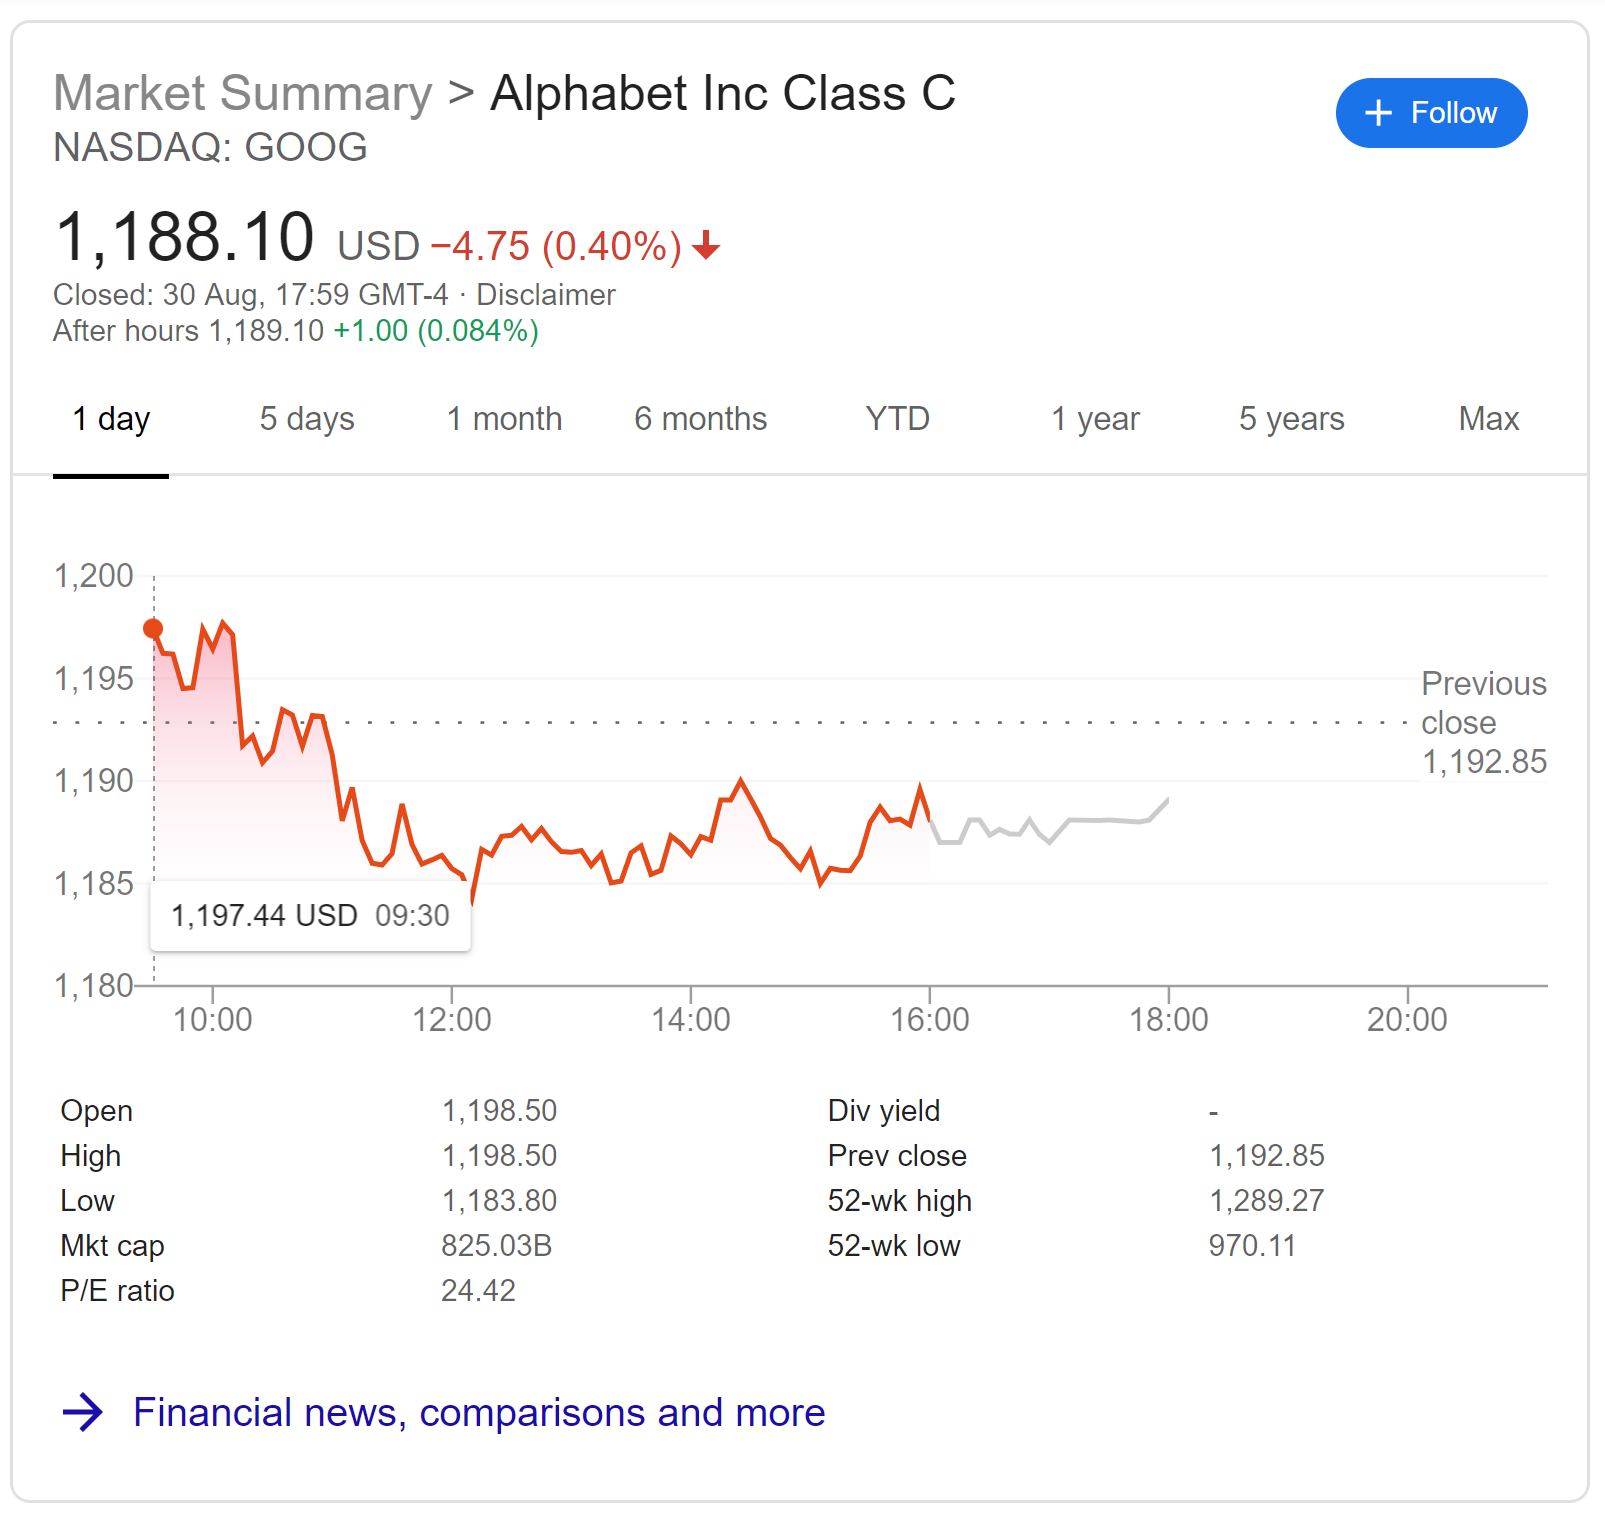

## Heatmaps

Suppose that we are dealing with a particular function, say $f(x, y) = x^2 + y^2$.

This function has two parameters, $x$ and $y$. In order to work out the geometry of this function, in particular, where it is likely to have its minimum and maximum value or values (much of machine learning is about optimisation, so finding minima and maxima is a common task), we produce a heatmap. To this end, we shall use the `seaborn` library, rather than Matplotlib:

In [25]:
grid = [(x, y, x*x + y*y) for x in range(-5, 6) for y in range(-5, 6)]

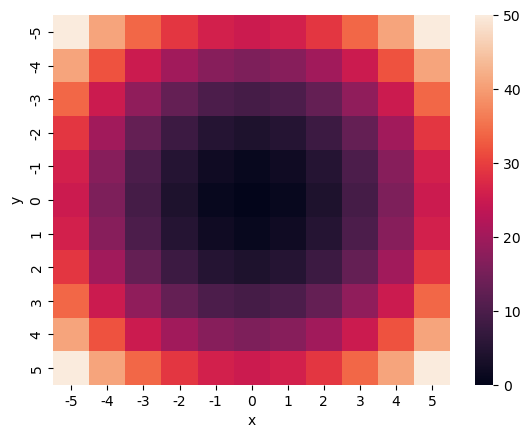

In [26]:
import seaborn as sns
data = np.empty((11, 11))
for p in grid:
    data[p[0] + 5, p[1] + 5] = p[2]
ax = sns.heatmap(data,
            xticklabels=sorted({p[0] for p in grid}),
            yticklabels=sorted({p[1] for p in grid}))
ax.set(xlabel='x', ylabel='y');

If the function has more than two parameters, we could produce a heatmap for each pair or parameters and use these multiple heatmaps to work out the geometry of the function.

## Further reading

1. Edward R. Tufte. *The Visual Display of Quantitative Information*, second edition. Graphics Press USA, 2001.
1. Cole Nussbaumer Knaflic. *Storytelling with Data: A Data Visualization Guide for Business Professionals*. Wiley, 2015.
1. Andy Kirk. *Data Visualisation: A Handbook for Data Driven Design*, second edition. SAGE Publications Ltd, 2019.